In [20]:
import sys
import yaml
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import os

### 1. Paths and config load

In [21]:
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

CONFIG_PATH = project_root / "config" / "config.yaml"
if not CONFIG_PATH.exists():
    raise FileNotFoundError(f"Config file not found: {CONFIG_PATH}")

with open(CONFIG_PATH, "r") as f:
    CONFIG = yaml.safe_load(f)

RAW_DIR = project_root / CONFIG['dataset']['raw_input_dir']
MASK_DIR = project_root / CONFIG['dataset']['mask_dir']

print(f"RAW dir: dataset/{RAW_DIR.name}")
print(f"MASK dir: dataset/{MASK_DIR.name}")

RAW dir: dataset/raw
MASK dir: dataset/masks


In [22]:
def visualize_single_pair(ax_orig, ax_mask, img_orig, masked_img, title):
    
    # original img
    ax_orig.imshow(img_orig)
    ax_orig.set_title(f"{title} Original", fontsize=8)
    ax_orig.axis('off')

    # masked img
    ax_mask.imshow(masked_img)
    ax_mask.set_title(f"{title} (masked)", fontsize=8)
    ax_mask.axis('off')


def get_masked_image(raw_path: Path, mask_path: Path):
    try:
        img_orig = Image.open(raw_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")
        
        black_bg = Image.new("RGB", img_orig.size, (0, 0, 0))
        masked_img = Image.composite(img_orig, black_bg, mask)
        
        return img_orig, masked_img
    except Exception as e:
        # print(f"Error processing {raw_path.name}: {e}")
        return None, None


### 3. iteration and visualization logic

In [33]:
def visualize_dataset_sample(raw_base_dir: Path, mask_base_dir: Path, n_samples_per_subfolder: int = 5):
    for class_folder in raw_base_dir.iterdir():
        if not class_folder.is_dir():
            continue

        for subclass_folder in class_folder.iterdir():
            if not subclass_folder.is_dir():
                continue
            
            subclass_name = subclass_folder.relative_to(raw_base_dir) # 1_straight/1a etc
            
            raw_files = [f for f in subclass_folder.iterdir() if f.is_file() and f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.webp']]
            
            if not raw_files:
                continue

            # random sample for visualization
            samples_to_draw = min(n_samples_per_subfolder, len(raw_files))
            selected_samples = random.sample(raw_files, samples_to_draw)
            
            print(f"Class: {subclass_name} (Visualization of {samples_to_draw} pairs)")

            fig, axes = plt.subplots(2, samples_to_draw, figsize=(3 * samples_to_draw, 7))
            
            if samples_to_draw == 1:
                axes = np.array([[axes[0]], [axes[1]]])


            for i, raw_path in enumerate(selected_samples):
        
                mask_path = mask_base_dir / subclass_name / (raw_path.stem + ".png")
                
                img_orig, masked_img = get_masked_image(raw_path, mask_path)
                
                if img_orig is not None:
                    # Rysowanie w macierzy osi (axes)
                    # upper row: original
                    axes[0, i].imshow(img_orig)
                    axes[0, i].set_title(f"{raw_path.stem} (original)", fontsize=8)
                    axes[0, i].axis('off')
                    
                    # bottom row: masked
                    axes[1, i].imshow(masked_img)
                    axes[1, i].set_title(f"(masked)", fontsize=8)
                    axes[1, i].axis('off')

            
            plt.tight_layout()
            plt.show()

### 4. Visualisation

Class: 1_straight\1a (Visualization of 1 pairs)


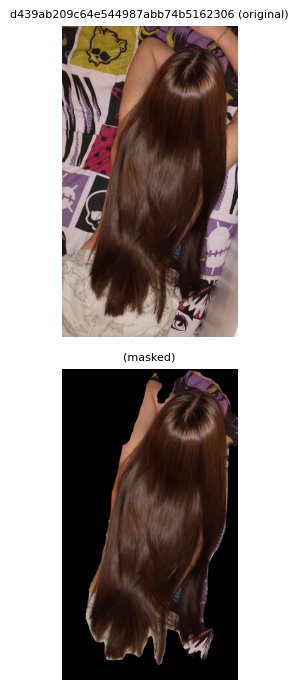

Class: 1_straight\1b (Visualization of 1 pairs)


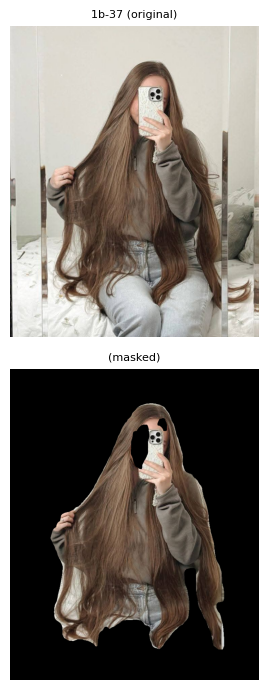

Class: 1_straight\1c (Visualization of 1 pairs)


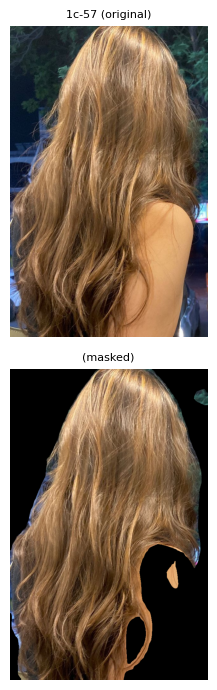

Class: 2_wavy\2a (Visualization of 1 pairs)


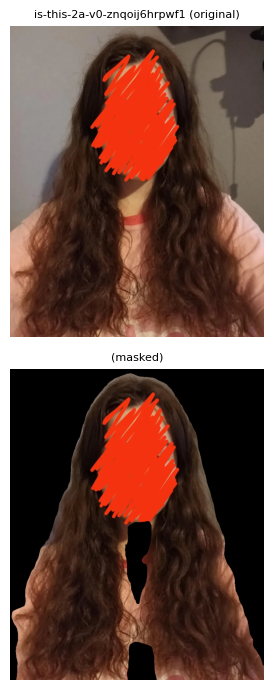

Class: 2_wavy\2b (Visualization of 1 pairs)


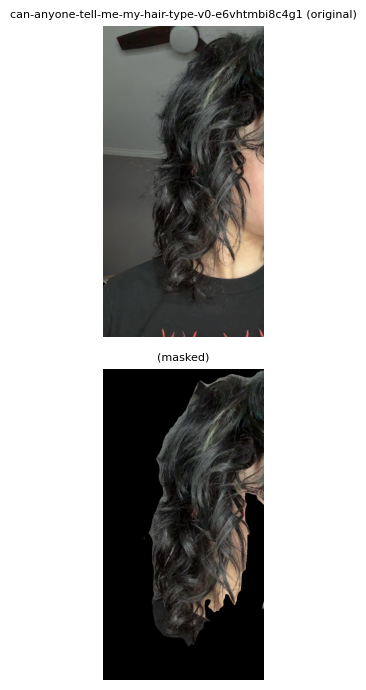

Class: 2_wavy\2c (Visualization of 1 pairs)


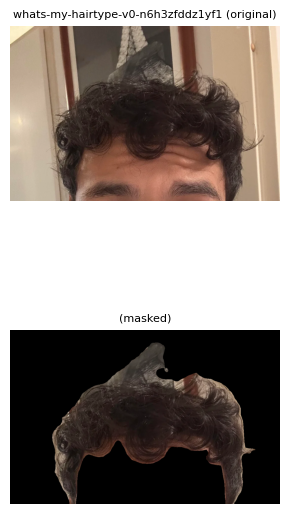

Class: 3_curly\3a (Visualization of 1 pairs)


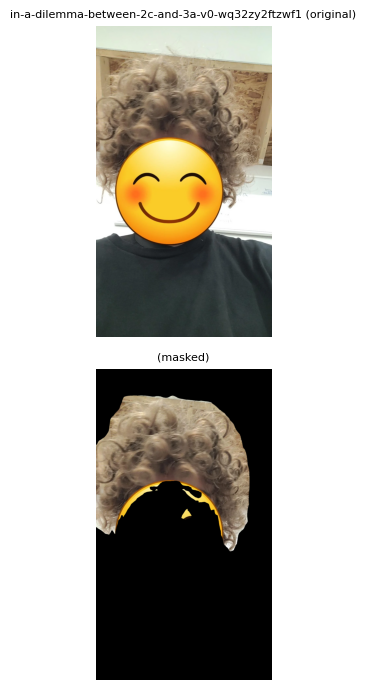

Class: 3_curly\3b (Visualization of 1 pairs)


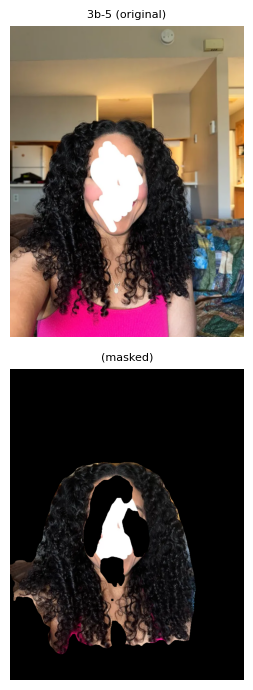

Class: 3_curly\3c (Visualization of 1 pairs)


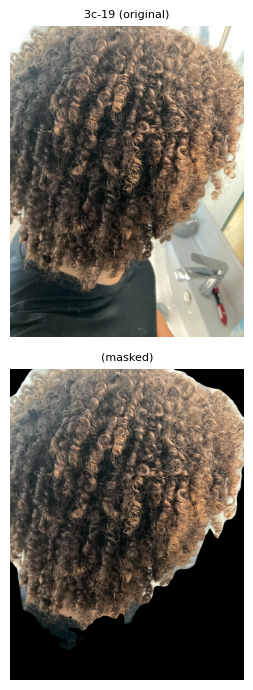

In [44]:
%matplotlib inline 

visualize_dataset_sample(RAW_DIR, MASK_DIR, n_samples_per_subfolder=1)